In [1]:
#include "../include/math60082_leastSquaresFit.hpp"
#include <vector>
#include <iostream>
#include <random>

In [2]:
.L boost_system

In [3]:
.L ../lib/libmath60082.so

In [4]:
.L libgsl.so

In [5]:
.L libcblas.so

In [6]:
#include "math60082_gnuplot_image.hpp"

In [7]:
// number of exercise dates
int timeSteps=3;
// some parameters in the problem
double maturity=3.,interestRate=0.06,strikePrice=1.1;
// local parameters
double dt=maturity/timeSteps;
// number of paths n
int n=8;
    

In [8]:
// the paths as given in Longstaff & Schartz (2001)
std::vector< std::vector<double> > paths = {
        { 1. , 1.09 , 1.08 , 1.34 } ,
        { 1. , 1.16 , 1.26 , 1.54 } ,
        { 1. , 1.22 , 1.07 , 1.03 } ,
        { 1. , 0.93 , 0.97 , 0.92 } ,
        { 1. , 1.11 , 1.56 , 1.52 } ,
        { 1. , 0.76 , 0.77 , 0.90 } ,
        { 1. , 0.92 , 0.84 , 1.01 } ,
        { 1. , 0.88 , 1.22 , 1.34 } ,
    };

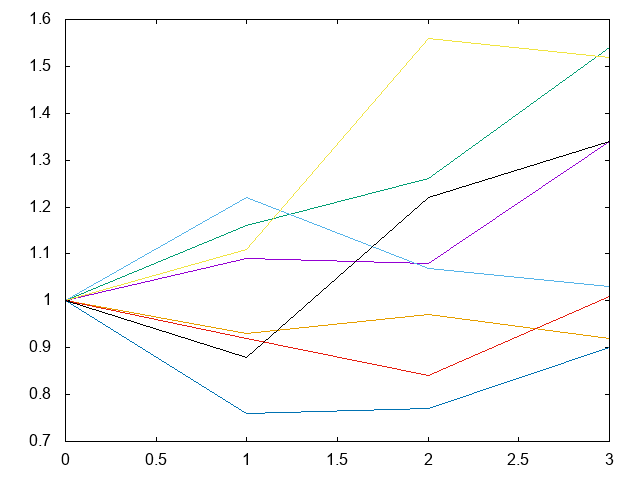

In [9]:
std::vector<double> t = { 0., 1. ,2. ,3.};
    // plot the figure
{
    // put the plot in figure1
    GPLT::figure = GPLT::G.plotData(t,paths,0);
}
// show figure
GPLT::figure

In [10]:
// all paths initially exected to be exercised at expiry
std::vector<int> exercisePeriod = std::vector<int>(n,timeSteps);
    

In [11]:
      // create an empty set of data points
        std::vector<MATH60082::DataPoint> data;
        data.reserve(n);
        // go through each path, check if it is in the money
        // if it is add it as a datapoint with appropriate payoff
        for(int i=0;i<n;i++)
        {
            if(paths[i][2]<strikePrice)
            {
                data.push_back({paths[i][2],std::max(strikePrice - paths[i][3],0.)*exp(-interestRate*dt),1.});
            }
        }

In [12]:

        std::cout << "# Points for fitting\n x_i  y_i \n";
        for(auto di : data)
            std::cout << di.x << " " << di.y << "\n";
        

# Points for fitting
 x_i  y_i 
1.08 0
1.07 0.0659235
0.97 0.169518
0.77 0.188353
0.84 0.0847588


In [13]:
// get the continuation function
MATH60082::LeastSquaresFit V;
V.generateFit(2,data);

std::cout << V << "\n";

 LeastSquaresFit of degree 2 valid over the range x\in[0.77:1.08] :: {  Chebyshev polynomial degree 2 :: { 0.11614 -0.0576143 -0.0217856 } } which gives a range of the function  f\in[0.151969:0.0367406]
# covariance matrix:
 0.233764  -0.0280476  -0.0985483 
 -0.0280476  0.32336  -0.0518404 
 -0.0985483  -0.0518404  0.347209 
# chisq = 0.0109127



In [14]:
std::cout << "# fitted estimation \n  x_i \t   y_i  \t V(x_i) \n";
 
for(auto di : data)
    std::cout << di.x << "\t " << di.y << "\t " << V(di.x) << "\n";



# fitted estimation 
  x_i 	   y_i  	 V(x_i) 
0.77	 0.188353	 0.151969
0.84	 0.0847588	 0.156418
0.97	 0.169518	 0.117527
1.07	 0.0659235	 0.0458983
1.08	 0	 0.0367406


In [15]:

        std::cout << "# Cash flow at this step: \ni kstar  V \n";
        // then select those paths and check against continuation function
        for(int i=0;i<int(n);i++)
        {
            std::cout << i+1 << " ";
            if(paths[i][2]<strikePrice)
            {
                double exerciseValue=std::max(strikePrice - paths[i][2],0.);
                if(exerciseValue>V(paths[i][2]))
                {
                    exercisePeriod[i]=2;
                    std::cout << exercisePeriod[i] << "     " << strikePrice - paths[i][2] << "\n";
                }
                else 
                {
                    std::cout << exercisePeriod[i] << "     " << std::max(strikePrice - paths[i][3],0.)*exp(-interestRate*dt) << "\n";
                } 
            }
            else
            {
                std::cout << exercisePeriod[i] << "     " << std::max(strikePrice - paths[i][3],0.)*exp(-interestRate*dt) << "\n";
            }
        }

# Cash flow at this step: 
i kstar  V 
1 3     0
2 3     0
3 3     0.0659235
4 2     0.13
5 3     0
6 2     0.33
7 2     0.26
8 3     0


In [17]:
n = 100;

paths;

exercisePeriod = std::vector<int>(n,timeSteps);
    
    // assume that time period is t=2
    for(int k=timeSteps-1;k>=1;k--)
    { 
        // create an empty set of data points
        std::vector<MATH60082::DataPoint> data;
        data.reserve(paths.size());
        // go through each path, check if it is in the money
        // if it is add it as a datapoint with appropriate payoff
        for(int i=0;i<int(paths.size());i++)
        {
            if(paths[i][k]<strikePrice)
            {
                int kStar=exercisePeriod[i];
                double tStar=(kStar-k)*dt;
                data.push_back({paths[i][k],std::max(strikePrice - paths[i][kStar],0.)*exp(-interestRate*tStar),1.});
            }
        }
        
        std::cout << "# Points for fitting\n x_i  y_i \n";
        for(auto di : data)
            std::cout << di.x << " " << di.y << "\n";
        
        // get the continuation function
        MATH60082::LeastSquaresFit V;
        
        V.generateFit(2,data);
        
        std::cout << V << "\n";
        
        std::cout << "# fitted estimation \n  x_i \t   y_i  \t V(x_i) \n";
        
        for(auto di : data)
            std::cout << di.x << "\t " << di.y << "\t " << V(di.x) << "\n";
        
        std::cout << "# Cash flow at "<<k<<"th step: \ni kstar  V \n";
        // then select those paths and check against continuation function
        for(int i=0;i<int(paths.size());i++)
        {
            std::cout << i+1 << " ";
            if(paths[i][k]<strikePrice)
            {
                double exerciseValue=std::max(strikePrice - paths[i][k],0.);
                if(exerciseValue>V(paths[i][k]))
                {
                    exercisePeriod[i]=k;
                    std::cout << exercisePeriod[i] << "     " << strikePrice - paths[i][k] << "\n";
                }
                else 
                {
                    int kStar=exercisePeriod[i];
                    double tStar=(kStar-k)*dt;
                    std::cout << exercisePeriod[i] << "     " << std::max(strikePrice - paths[i][kStar],0.)*exp(-interestRate*tStar) << "\n";
                } 
            }
            else
            {
                int kStar=exercisePeriod[i];
                double tStar=(kStar-k)*dt;
                std::cout << exercisePeriod[i] << "     " << std::max(strikePrice - paths[i][kStar],0.)*exp(-interestRate*tStar) << "\n";
            }
        }
        
    }
    
    {
        // implement Monte Carlo on the paths
        double sum=0.;
        for(int i=0;i<n;i++)
        {
            int k=exercisePeriod[i];
            double exerciseValue=std::max(strikePrice - paths[i][k],0.);
            double exerciseTime=k*dt;
            sum+=exerciseValue*exp(-interestRate*exerciseTime);
        }
        std::cout << "\n#\n##\n# Option Value is " << sum/n << "\n";
    }

# Points for fitting
 x_i  y_i 
1.08 0
1.07 0.0659235
0.97 0.169518
0.77 0.188353
0.84 0.0847588
 LeastSquaresFit of degree 2 valid over the range x\in[0.77:1.08] :: {  Chebyshev polynomial degree 2 :: { 0.11614 -0.0576143 -0.0217856 } } which gives a range of the function  f\in[0.151969:0.0367406]
# covariance matrix:
 0.233764  -0.0280476  -0.0985483 
 -0.0280476  0.32336  -0.0518404 
 -0.0985483  -0.0518404  0.347209 
# chisq = 0.0109127

# fitted estimation 
  x_i 	   y_i  	 V(x_i) 
0.77	 0.188353	 0.151969
0.84	 0.0847588	 0.156418
0.97	 0.169518	 0.117527
1.07	 0.0659235	 0.0458983
1.08	 0	 0.0367406
# Cash flow at 2th step: 
i kstar  V 
1 3     0
2 3     0
3 3     0.0659235
4 2     0.13
5 3     0
6 2     0.33
7 2     0.26
8 3     0
# Points for fitting
 x_i  y_i 
1.09 0
0.93 0.122429
0.76 0.310782
0.92 0.244859
0.88 0
 LeastSquaresFit of degree 2 valid over the range x\in[0.76:1.09] :: {  Chebyshev polynomial degree 2 :: { 0.13131 -0.13629 0.0184648 } } which gives a range of th